```{contents}
```

# Hyperparameter Tuning

Hierarchical clustering has fewer hyperparameters compared to algorithms like K-Means, but they still critically influence the clustering outcome:

1. **Linkage Criteria** (`linkage`):

   * Defines how the distance between clusters is computed.
   * Common options:

     * `single`: Distance between the closest points of clusters (can create "chaining effect").
     * `complete`: Distance between the farthest points (tends to produce compact clusters).
     * `average`: Average distance between all points in clusters.
     * `ward`: Minimizes variance within clusters (requires Euclidean distance).
   * **Impact:** Different linkage choices lead to different dendrogram structures and cluster assignments.

2. **Distance Metric** (`metric`):

   * Determines how the distance between points is computed.
   * Options include `euclidean`, `manhattan`, `cosine`, etc.
   * **Impact:** Changing the distance metric changes the shape and size of clusters. For example, `cosine` is better for text embeddings.

3. **Number of Clusters** (`n_clusters`) or **Cut-off Threshold**:

   * Hierarchical clustering produces a dendrogram; you can cut it at a certain **height** to get clusters.
   * **Options:**

     * Predefine number of clusters: `n_clusters=3`
     * Use a distance threshold: `distance_threshold=h`
   * **Impact:** The number of clusters can drastically change the interpretation.

---

## Hyperparameter Tuning Workflow

Unlike K-Means or supervised models, hierarchical clustering has no gradient or cost function to minimize directly. Instead, tuning relies on **cluster evaluation metrics**:

**Step-by-step:**

1. **Choose a distance metric and linkage method**:

   * Start with common choices like `ward` + `euclidean`.
   * Optionally, try `average` or `complete` if data has irregular shapes.

2. **Build dendrogram**:

   * Visualize cluster formation.
   * Helps identify natural cut points in the hierarchy.

3. **Decide on number of clusters**:

   * Cut dendrogram manually (by distance threshold) or set a fixed number.

4. **Evaluate clusters using metrics**:

   * If labels are available (supervised evaluation):

     * **Adjusted Rand Index (ARI)**
     * **Normalized Mutual Information (NMI)**
   * If labels are unavailable (unsupervised evaluation):

     * **Silhouette Score**
     * **Davies-Bouldin Index**
     * **Calinski-Harabasz Index**

5. **Iterate**:

   * Try different combinations of `linkage`, `metric`, and `distance threshold`.
   * Select combination with the best evaluation score.

---

## **3. Practical Tips**

* **Ward linkage** is generally preferred for numerical data because it minimizes intra-cluster variance.
* **Single linkage** can lead to elongated clusters (“chaining effect”).
* Use **Silhouette Score** when labels are unavailable to guide hyperparameter choice.
* Avoid overly large numbers of clusters; hierarchical clustering can overfit noise if cut too low.

---

**Summary:**

* **Hyperparameters:** linkage method, distance metric, number of clusters (or cut-off height).
* **Tuning approach:** grid search + evaluation metrics (Silhouette, Davies-Bouldin).
* **Visualization:** dendrograms are crucial for intuition and confirming cluster choice.

Best Silhouette Score: 0.8467003894636074
Best Hyperparameters: {'linkage': 'ward', 'metric': 'euclidean'}


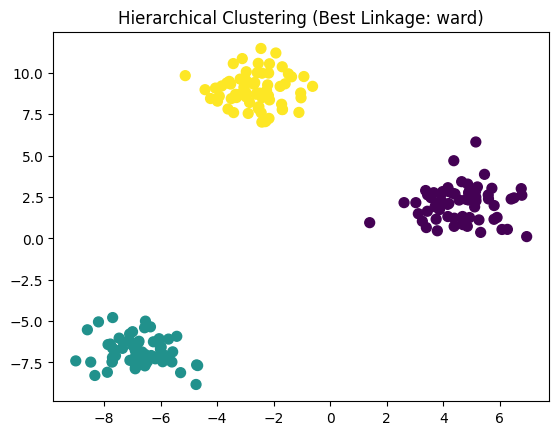

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# Example hyperparameter grid
linkages = ['ward', 'complete', 'average']
metrics = ['euclidean', 'manhattan']
best_score = -1
best_params = {}
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

for linkage in linkages:
    for metric in metrics:
        # Ward requires euclidean
        if linkage == 'ward' and metric != 'euclidean':
            continue
        model = AgglomerativeClustering(n_clusters=3, linkage=linkage, metric=metric)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = {'linkage': linkage, 'metric': metric}

print("Best Silhouette Score:", best_score)
print("Best Hyperparameters:", best_params)

# Apply best model
model = AgglomerativeClustering(n_clusters=3, linkage=best_params['linkage'], metric=best_params['metric'])
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"Hierarchical Clustering (Best Linkage: {best_params['linkage']})")
plt.show()
